In [51]:
# Import Libraries

In [52]:
#pip install tensorflow

In [53]:
#pip install opencv-python

In [54]:
import numpy as np
import pandas as pd 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras import utils  # to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import cv2

In [55]:
# constants

In [56]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [57]:
# lets create data frame

In [58]:
filenames = os.listdir("C:/Users/admin/Documents/assingment questions/DS May - 04th Nov/train")
categories=[]
for i in filenames:
    category =i.split(".")[0]
    if category == "dog":
        categories.append(1)
    else:
        categories.append(0)
df= pd.DataFrame({"filename" : filenames, "category": categories})

In [59]:
df.shape

(402, 2)

In [60]:
df.head()

,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.101.jpg,0


In [61]:
df.shape

(402, 2)

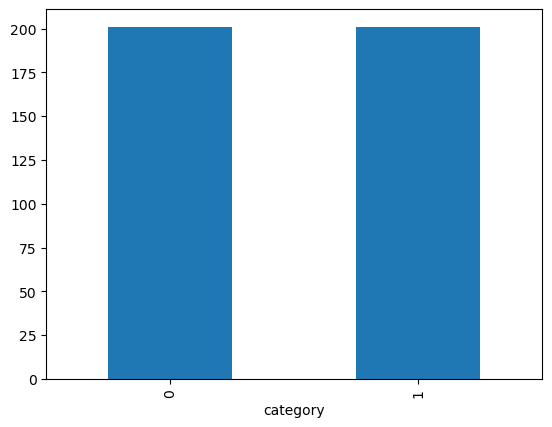

In [62]:
df["category"].value_counts().plot.bar()
plt.show()

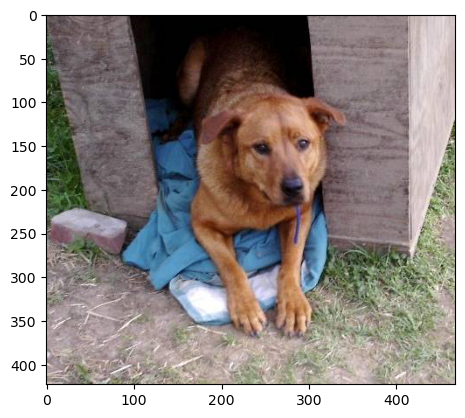

In [63]:
sam=random.choice(filenames)
image= load_img("C:/Users/admin/Documents/assingment questions/DS May - 04th Nov/train/"+sam)
plt.imshow(image)
plt.show()

# Build Model

<img src="https://i.imgur.com/ebkMGGu.jpg" width="100%"/>

* **Input Layer**: It represent input image data. It will reshape image into single diminsion array. Example your image is 64x64 = 4096, it will convert to (4096,1) array.
* **Conv Layer**: This layer will extract features from image.
* **Pooling Layer**: This layerreduce the spatial volume of input image after convolution.
* **Fully Connected Layer**: It connect the network from a layer to another layer
* **Output Layer**: It is the predicted values layer. 

### Lets import model and lyers

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Activation, BatchNormalization

In [65]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation= "relu", input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS))) # 128,128 is for image size and 3 is for rbg
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), activation= "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
            
model.add(Conv2D(128,(3,3), activation= "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
    
model.add(Flatten())    
model.add(Dense(512, activation= "relu")) 
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2, activation= "softmax"))
          
model.compile(optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])
          
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_4 (Bat  (None, 126, 126, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_5 (Bat  (None, 61, 61, 64)       

In [66]:
### will do erly stop to prevent from overfitting

In [67]:
earlystop = EarlyStopping(patience=10)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.5, min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

In [68]:
# lets convert category column from integer to categorical to use image generator

In [69]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 

### lets import train_test_split

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
train_data, validate_data = train_test_split(df, test_size= 0.2, random_state= 0)
train_data = train_data.reset_index(drop=True)
validate_data = validate_data.reset_index(drop=True)

In [72]:
train_data.head()

,filename,category
0,cat.9.jpg,cat
1,dog.31.jpg,dog
2,dog.147.jpg,dog
3,cat.156.jpg,cat
4,cat.148.jpg,cat


<Axes: xlabel='category'>

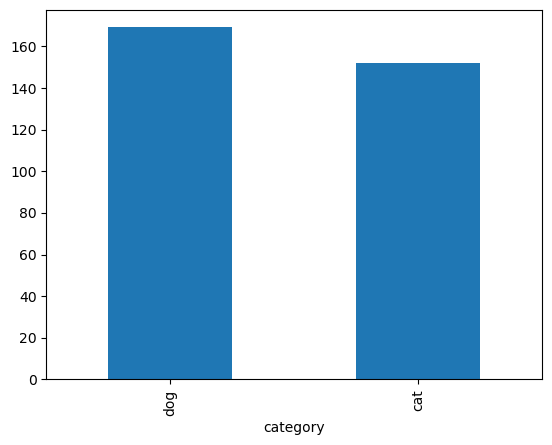

In [73]:
train_data["category"].value_counts().plot.bar()

In [74]:
train_data.shape

(321, 2)

In [75]:
validate_data.shape

(81, 2)

In [76]:
train_data.shape

(321, 2)

In [77]:
total_train = train_data.shape[0]
total_validate = validate_data.shape[0]
batch_size=15

In [78]:
# Lets do generator for training

In [79]:
train_datagen =ImageDataGenerator( 
  rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator= train_datagen.flow_from_dataframe(
    train_data,
    "C:/Users/admin/Documents/assingment questions/DS May - 04th Nov/train",
    x_col='filename',
    y_col='category',
    target_size=(128,128),
    class_mode='categorical',
    batch_size=15
)

Found 321 validated image filenames belonging to 2 classes.


In [80]:
# Lets do generator for validation

In [81]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(
    validate_data, 
    "C:/Users/admin/Documents/assingment questions/DS May - 04th Nov/train",
    x_col='filename',
    y_col='category',
    target_size=(128,128),
    class_mode='categorical',
    batch_size=15
)

Found 81 validated image filenames belonging to 2 classes.


# Lets See now that how our generator works

In [82]:
example_df = train_data.sample(n=1).reset_index(drop=True) # n=1 is used to tke 1 sample
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "C:/Users/admin/Documents/assingment questions/DS May - 04th Nov/train",
    x_col='filename',
    y_col='category',
    target_size=(128,128),
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


# lets print some generated images

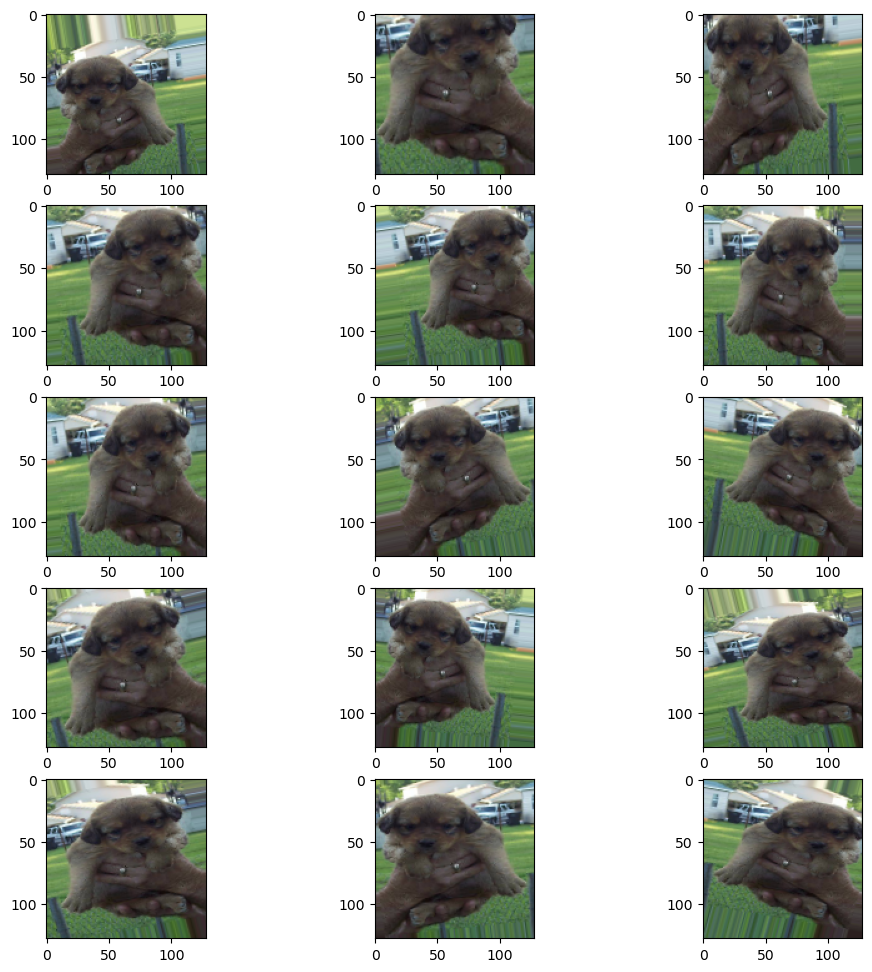

In [83]:
plt.figure(figsize=(12,12))
for i in range(1,16):
    plt.subplot(5,3,i)
    for X_batch, Y_batch in example_generator:
        image=X_batch[0]
        plt.imshow(image)
        break
plt.show()       

In [84]:
total_train = train_data.shape[0]
total_validate = validate_data.shape[0]

## Lets fit the model

In [85]:
FAST_RUN=False
epochs=3 if FAST_RUN else 50

history= model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//15,
    steps_per_epoch=total_train//15,
    callbacks=callbacks
)
model.save("model.h5")

Epoch 1/50
21/21 [==============================] - 24s 843ms/step - loss: 1.9888 - accuracy: 0.5048 - val_loss: 1.3472 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 2/50
21/21 [==============================] - 15s 704ms/step - loss: 1.2281 - accuracy: 0.5556 - val_loss: 1.3924 - val_accuracy: 0.3733 - lr: 0.0010
Epoch 3/50
21/21 [==============================] - ETA: 0s - loss: 1.1974 - accuracy: 0.5556
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
21/21 [==============================] - 13s 598ms/step - loss: 1.1974 - accuracy: 0.5556 - val_loss: 1.4029 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 4/50
21/21 [==============================] - 13s 603ms/step - loss: 0.8599 - accuracy: 0.6471 - val_loss: 3.4110 - val_accuracy: 0.6000 - lr: 5.0000e-04
Epoch 5/50
21/21 [==============================] - ETA: 0s - loss: 0.8058 - accuracy: 0.6667
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
21/21 [==============================] - 13

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Let our model predict 

In [88]:
for i in range(10):
    all_test_images = os.listdir("C:/Users/admin/Documents/assingment questions/DS May - 04th Nov/test")
    random_image = random.choice(all_test_images)
    #print("image name is:- ",random_image)
    img = cv2.imread(f'C:/Users/admin/Documents/assingment questions/DS May - 04th Nov/test/{random_image}')
    #print(img)
    img = cv2.resize(img,(IMAGE_HEIGHT,IMAGE_WIDTH))
    
    org = img.copy()
    img = img.reshape(1,128,128,3)
    
    pred = model.predict(img)
    print(['cat','dog'][int(pred[0][0])])
    cv2.imshow('Live predictions',org)
    cv2.waitKey(0)
cv2.destroyAllWindows()

1/1 [==============================] - 0s 34ms/step
dog
1/1 [==============================] - 0s 38ms/step
dog
1/1 [==============================] - 0s 38ms/step
dog
1/1 [==============================] - 0s 47ms/step
dog
1/1 [==============================] - 0s 31ms/step
dog
1/1 [==============================] - 0s 31ms/step
dog
1/1 [==============================] - 0s 38ms/step
dog
1/1 [==============================] - 0s 53ms/step
dog
1/1 [==============================] - 0s 47ms/step
dog
1/1 [==============================] - 0s 38ms/step
dog
